In [17]:
!pip install keras


In [18]:
!pip install tensorflow

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
x_train = np.loadtxt('Downloads/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
y_train = np.loadtxt('Downloads/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')
x_test = np.loadtxt('Downloads/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
y_test = np.loadtxt('Downloads/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [4]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
print("x_train shape: ", x_train.shape)

x_train shape:  (2000, 100, 100, 3)


In [8]:
x_train[1,:]

array([[[0.00201461, 0.00196847, 0.00207612],
        [0.00246059, 0.00241446, 0.00252211],
        [0.00304498, 0.00295271, 0.00313725],
        ...,
        [0.00384468, 0.0038293 , 0.00379854],
        [0.00392157, 0.00392157, 0.00389081],
        [0.00384468, 0.0038293 , 0.00376778]],

       [[0.00215302, 0.00210688, 0.00221453],
        [0.00195309, 0.00190696, 0.00201461],
        [0.00184544, 0.00175317, 0.00190696],
        ...,
        [0.00386005, 0.00389081, 0.00387543],
        [0.00390619, 0.00392157, 0.00389081],
        [0.00390619, 0.00392157, 0.00386005]],

       [[0.00313725, 0.0031065 , 0.00318339],
        [0.00287582, 0.00284506, 0.00292195],
        [0.00226067, 0.00218378, 0.00227605],
        ...,
        [0.0038293 , 0.00392157, 0.00392157],
        [0.00366013, 0.00379854, 0.00372165],
        [0.00356786, 0.00370627, 0.00362937]],

       ...,

       [[0.00267589, 0.00279892, 0.00299885],
        [0.00264514, 0.00276817, 0.00296809],
        [0.00273741, 0

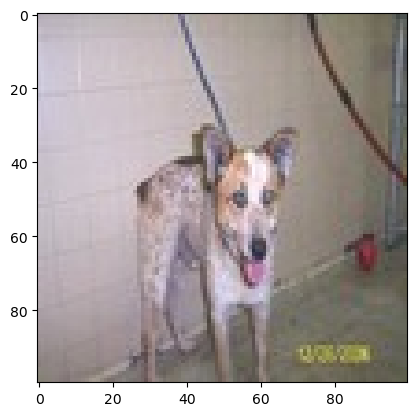

In [7]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()           

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'), 
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

In [15]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model.fit(x_train , y_train , epochs = 5, batch_size = 64)


Epoch 1/5
32/32 [==============================] - 13s 344ms/step - loss: 0.3953 - accuracy: 0.8190
Epoch 2/5
32/32 [==============================] - 11s 329ms/step - loss: 0.3147 - accuracy: 0.8635
Epoch 3/5
32/32 [==============================] - 11s 333ms/step - loss: 0.2933 - accuracy: 0.8860
Epoch 4/5
32/32 [==============================] - 11s 334ms/step - loss: 0.2231 - accuracy: 0.9210
Epoch 5/5
32/32 [==============================] - 11s 335ms/step - loss: 0.1643 - accuracy: 0.9450


In [14]:
model.evaluate(x_test , y_test)

13/13 [==============================] - 1s 51ms/step - loss: 0.5915 - accuracy: 0.7200


[0.5915334224700928, 0.7200000286102295]

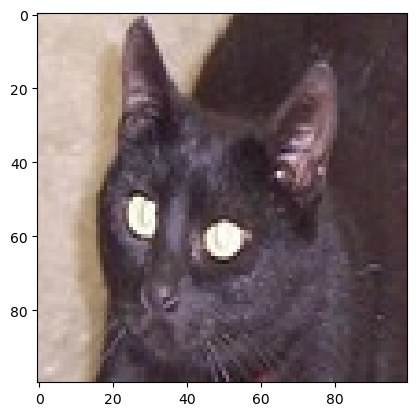

1/1 [==============================] - 0s 47ms/step
model says: dog


In [24]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
    
print ("model says:", pred)

